# Binary Classification of Insurance Cross Selling
Kaggle Playground Series - Season 4, Episode 7

Dataset Link:https://www.kaggle.com/competitions/playground-series-s4e7

### Goal:
The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

### Evaluation:
Submissions are evaluated using area under the **ROC curve using the predicted probabilities and the ground truth targets.**


### Dataset Description
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Health Insurance Cross Sell Prediction Data dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

This notebook gives more details about the dataset used for this competition.

### Files
train.csv - the training dataset; Response is the binary target
test.csv - the test dataset; your objective is to predict the probability of Response for each row
sample_submission.csv - a sample submission file in the correct format

In [1]:
# Importing the libraries and Loading the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [3]:
# checking the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [4]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Checking all the columns

> ID , primary key

In [5]:
df.id.nunique()

11504798

In [6]:
# Dropping this columns as its a primary key
df.drop('id', axis =1, inplace =True)

> GENDER

In [7]:
df.Gender.value_counts()

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

In [8]:
df.Gender.value_counts(normalize= True)

Gender
Male      0.541351
Female    0.458649
Name: proportion, dtype: float64

        Male Female Ratio: 54:46

In [9]:
# encoding the categories

df.Gender = df.Gender.replace(['Female','Male'],[0,1])

> AGE

In [10]:
round(df.Age.describe(),1)

count    11504798.0
mean           38.4
std            15.0
min            20.0
25%            24.0
50%            36.0
75%            49.0
max            85.0
Name: Age, dtype: float64

- Age varies from 20 to 85 years, lets plot a histogram to check the distribution patern

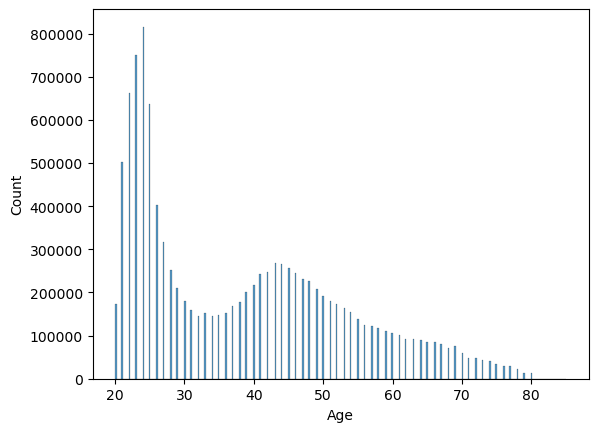

In [11]:
sns.histplot(df.Age)
plt.show()

- The largest no. of customers are int he age group 20-30 years, and then 40-50 years

> Driving_License

In [12]:
df.Driving_License.value_counts(normalize =True)

Driving_License
1    0.998022
0    0.001978
Name: proportion, dtype: float64

- 99.8% customers have Driving license, wbich is a mandate for selling automobile insurances.

> Region_Code

In [13]:
df.Region_Code.nunique()

54

- This must be a Geographical code that can help draw inferences about the customers in paricular Region, and help devise Region specific strategies.

> Previously_Insured

In [14]:
df.Previously_Insured.value_counts(normalize=True)

Previously_Insured
0    0.537003
1    0.462997
Name: proportion, dtype: float64

- The ratio of previously insured to that of not insured is 46:54

> Vehicle_Age

In [15]:
df.Vehicle_Age.unique()

array(['1-2 Year', '> 2 Years', '< 1 Year'], dtype=object)

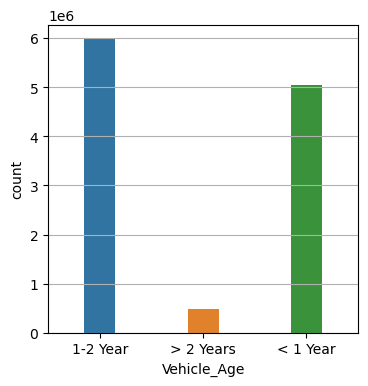

In [16]:
plt.figure(figsize =(4,4))
sns.countplot(x=df.Vehicle_Age, width =0.3)
plt.grid(axis ='y')
plt.show()

In [17]:
# lets encode the Vehicle_Age column
df.Vehicle_Age =df.Vehicle_Age.replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2])
df.Vehicle_Age.value_counts()

Vehicle_Age
1    5982678
0    5044145
2     477975
Name: count, dtype: int64

> Vehicle_Damage

In [18]:
df.Vehicle_Damage.value_counts(normalize=True)

Vehicle_Damage
Yes    0.50268
No     0.49732
Name: proportion, dtype: float64

- Ratio of Damage: Not-Damaged is 50:50

In [19]:
# lets encode the Vehicle_Age column Yes-1, No-0
df.Vehicle_Damage =df.Vehicle_Damage.replace(['Yes','No'],[1,0])
df.Vehicle_Damage.value_counts()

Vehicle_Damage
1    5783229
0    5721569
Name: count, dtype: int64

>Annual_Premium

In [20]:
round(df.Annual_Premium.describe(),2)

count    11504798.00
mean        30461.37
std         16454.75
min          2630.00
25%         25277.00
50%         31824.00
75%         39451.00
max        540165.00
Name: Annual_Premium, dtype: float64

>Policy_Sales_Channel

In [21]:
df.Policy_Sales_Channel.nunique()

152

>Vintage

In [22]:
df.Vintage.nunique()

290

> Target Column: Response

In [23]:
df.Response.value_counts(normalize= True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

- the Response ratio suggests only 12.3% sales and 87.7% customers have refused to purchase insurnace for their automobile.

In [24]:
# Lest study the customers with Response 1
df1= df[df.Response ==1]
df0 =df[df.Response ==0]

In [25]:
len(df1), len(df0), len(df1)+len(df0)

(1415059, 10089739, 11504798)

In [26]:
# checking for Duplicates in training dataset (after removing primary key 'id')
df.drop_duplicates(inplace =True)
len(df)

11504798

## Analysing the customers with Positive Response

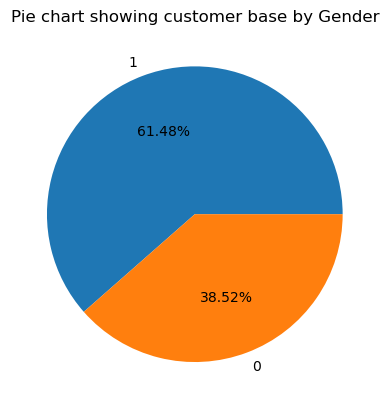

Gender
1    869998
0    545061
Name: count, dtype: int64

In [27]:
data=df1.Gender.value_counts()

plt.pie(data.values, labels =data.index, autopct="%1.2f%%")
plt.title('Pie chart showing customer base by Gender')
plt.show()

data

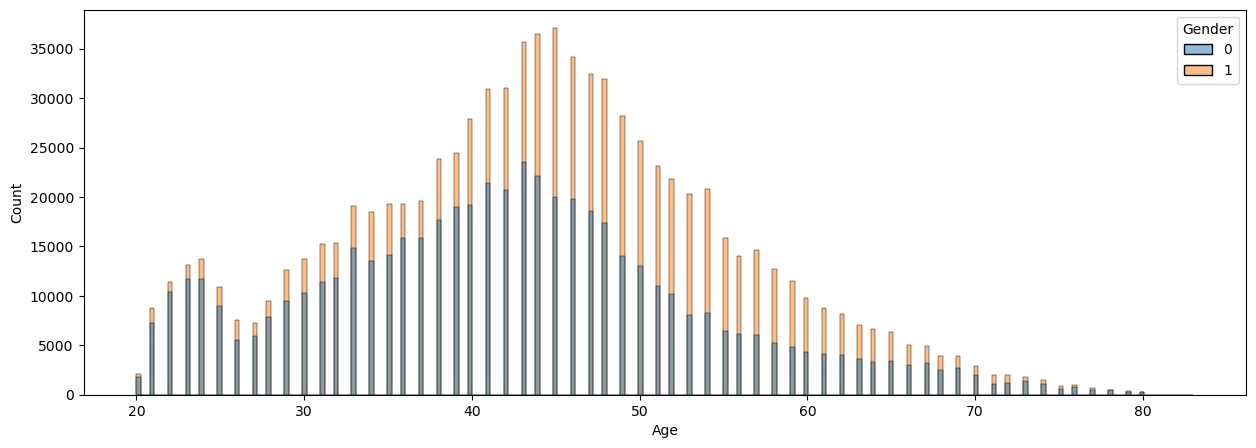

In [28]:
plt.figure(figsize =(15,5))
sns.histplot(x='Age', data=df1, hue ='Gender')
plt.show()

In [29]:
df1.Previously_Insured.value_counts(normalize=True)

Previously_Insured
0    0.997597
1    0.002403
Name: proportion, dtype: float64

- Only 0.24% customers who have previously_insured have chosen to undergo renewal
- 99.76% of sales if towards customers who have not previously inssured

In [30]:
data=pd.DataFrame(df1.groupby('Previously_Insured')[['Vehicle_Age','Vehicle_Damage']].value_counts())
data.dtypes

count    int64
dtype: object

In [31]:
sum(data['count'])

1415059

In [32]:
data['Percent'] =data['count']*100/sum(data['count'])
data

count    Percent
Previously_Insured Vehicle_Age Vehicle_Damage                    
0                  1           1               1047325  74.012815
                   0           1                198983  14.061817
                   2           1                142909  10.099155
                   1           0                 13765   0.972751
                   0           0                  8659   0.611918
                   2           0                    18   0.001272
1                  1           1                  1181   0.083459
                               0                  1001   0.070739
                   0           1                   629   0.044450
                               0                   578   0.040846
                   2           1                    11   0.000777

- Most of the customers 74% are belonging to the group:
    - Not Previously Insured
    - Vehicle Age 1-2 years
    - Vehicle Damaged "Yes"
- 2nd largest group of customer 14% belongs to:
    - Not Previously Insured
    - Vehicle Age <1 years
    - Vehicle Damaged "Yes"

> **Splitting the Data**

In [33]:
x=df.drop('Response', axis =1)
y=df.Response

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest, ytrain, ytest =train_test_split(x,y,test_size =0.3,random_state = 42, stratify =y)

In [35]:
ytrain.value_counts(normalize= True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

In [36]:
ytest.value_counts(normalize= True)

Response
0    0.877003
1    0.122997
Name: proportion, dtype: float64

- The Training set is imbalanced 

> **Using oversampling for imbalance**

In [95]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
xtrain, ytrain=smote.fit_resample(xtrain, ytrain)

KeyboardInterrupt: 

In [ ]:
ytrain.value_counts(normalize = True)

> **Scaling the Data**

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

>**ML models**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
logr= LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()
ad=AdaBoostClassifier()
xgb= XGBClassifier()

In [40]:
models = {'LOGR': logr, "DT": dt, 'RF': rf, 'AD': ad, 'SVC':svc, 'KNN':knn, 'XGB' :xgb}

In [41]:
#metrics
from sklearn.metrics import roc_auc_score

In [42]:
metrics =['roc_auc_score']

In [43]:
# results= dict.fromkeys(models, 0.0)
# for key in models:
#     results[key]={}
    
#     current_model= models[key]
#     current_model.fit(xtrain, ytrain)
    
#     result={'Train_AUC_score':0,'Test_AUC_score':0}
    
#     #training_scores
#     train_pred = current_model.predict(xtrain)
#     train_score =roc_auc_score(ytrain, train_pred)
#     result['Train_AUC_score:']=train_score
    
#     #testing
#     test_pred = current_model.predict(xtest)
#     test_score= roc_auc_score(ytest,test_pred)
#     result['Test_AUC_score:']=test_score

In [50]:
# LR
current_model=logr
current_model.fit(xtrain, ytrain)
#training_scores
train_pred = current_model.predict(xtrain)
train_score =roc_auc_score(ytrain, train_pred)

#testing
test_pred = current_model.predict(xtest)
test_score= roc_auc_score(ytest,test_pred)

print('Model: ', current_model)
print('Training ROC_AUC score: ', train_score)
print('Testing ROC_AUC score: ', test_score)
    

Model:  LogisticRegression()
Training ROC_AUC score:  0.5030039902175314
Testing ROC_AUC score:  0.5030442897102999


In [52]:
# DT
current_model=dt
current_model.fit(xtrain, ytrain)
#training_scores
train_pred = current_model.predict(xtrain)
train_score =roc_auc_score(ytrain, train_pred)

#testing
test_pred = current_model.predict(xtest)
test_score= roc_auc_score(ytest,test_pred)

print('Model: ', current_model)
print('Training ROC_AUC score: ', train_score)
print('Testing ROC_AUC score: ', test_score)
    

Model:  DecisionTreeClassifier()
Training ROC_AUC score:  1.0
Testing ROC_AUC score:  0.6211547671101074


In [57]:
# XGB
current_model=xgb
current_model.fit(xtrain, ytrain)
#training_scores
train_pred = current_model.predict(xtrain)
train_score =roc_auc_score(ytrain, train_pred)

#testing
test_pred = current_model.predict(xtest)
test_score= roc_auc_score(ytest,test_pred)

print('Model: ', current_model)
print('Training ROC_AUC score: ', train_score)
print('Testing ROC_AUC score: ', test_score)
   

Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training ROC_AUC score:  0.5419574280820364
Testing ROC_AUC score:  0.5409840305051081


> **Neural Network models**

In [46]:
model= Sequential()
model.add(Dense(10,input_dim =10, activation ='relu'))
model.add(Dense(4, activation ='relu' ))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer ='adam', loss= 'binary_crossentropy', metrics =[keras.metrics.AUC()])

history=model.fit(xtrain, ytrain, epochs = 5, validation_data=(xtest,ytest))

E:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
251668/251668 ━━━━━━━━━━━━━━━━━━━━ 646s 3ms/step - auc: 0.8475 - loss: 0.2698 - val_auc: 0.8548 - val_loss: 0.2659
Epoch 2/5
251668/251668 ━━━━━━━━━━━━━━━━━━━━ 695s 3ms/step - auc: 0.8546 - loss: 0.2658 - val_auc: 0.8555 - val_loss: 0.2654
Epoch 3/5
251668/251668 ━━━━━━━━━━━━━━━━━━━━ 623s 2ms/step - auc: 0.8550 - loss: 0.2654 - val_auc: 0.8557 - val_loss: 0.2657
Epoch 4/5
251668/251668 ━━━━━━━━━━━━━━━━━━━━ 592s 2ms/step - auc: 0.8554 - loss: 0.2653 - val_auc: 0.8562 - val_loss: 0.2655
Epoch 5/5
251668/251668 ━━━━━━━━━━━━━━━━━━━━ 602s 2ms/step - auc: 0.8552 - loss: 0.2655 - val_auc: 0.8560 - val_loss: 0.2653


In [54]:
# loss and accuracy on test set
model.evaluate(xtest,ytest)

107858/107858 ━━━━━━━━━━━━━━━━━━━━ 247s 2ms/step - auc: 0.8560 - loss: 0.2653


[0.26532483100891113, 0.8560142517089844]

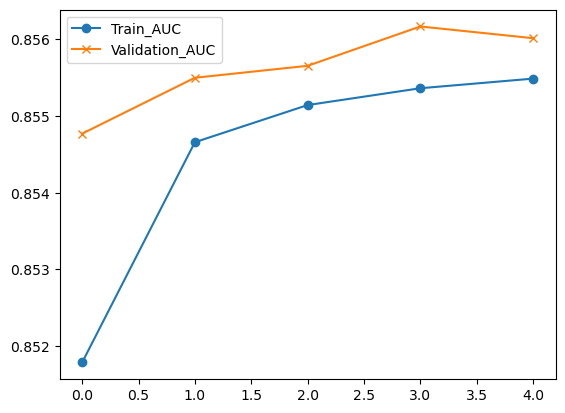

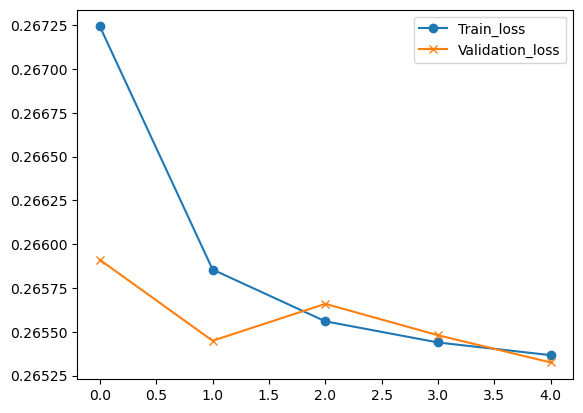

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'], marker ='o' ,label ='Train_AUC')
plt.plot(history.history['val_auc'], marker ='x',label ='Validation_AUC')
plt.legend()
plt.show()

# Similar plot for loss
plt.plot(history.history['loss'], marker ='o',label ='Train_loss')
plt.plot(history.history['val_loss'],marker ='x',label ='Validation_loss')
plt.legend()
plt.show()

## Making Predictions for the test.csv file

In [59]:
test=pd.read_csv("test.csv")
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [62]:
# Encoding the categorical values
test.Gender=test.Gender.replace(['Female','Male'],[0,1])
test.Vehicle_Damage=test.Vehicle_Damage.replace(['Yes','No'],[1,0])
test.Vehicle_Age=test.Vehicle_Age.replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2])

In [63]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,0,20,1,47.0,0,0,0,2630.0,160.0,228
1,11504799,1,47,1,28.0,0,1,1,37483.0,124.0,123
2,11504800,1,47,1,43.0,0,1,1,2630.0,26.0,271
3,11504801,0,22,1,47.0,1,0,0,24502.0,152.0,115
4,11504802,1,51,1,19.0,0,1,0,34115.0,124.0,148


In [64]:
# Scaling the dataset
test.drop('id', axis =1, inplace= True)
test=scaler.transform(test)
test

array([[0.        , 0.        , 1.        , ..., 0.        , 0.98148148,
        0.75432526],
       [1.        , 0.41538462, 1.        , ..., 0.06483857, 0.75925926,
        0.39100346],
       [1.        , 0.41538462, 1.        , ..., 0.        , 0.15432099,
        0.90311419],
       ...,
       [1.        , 0.41538462, 1.        , ..., 0.        , 0.84567901,
        0.183391  ],
       [1.        , 0.15384615, 1.        , ..., 0.06741142, 0.75925926,
        0.37716263],
       [1.        , 0.04615385, 1.        , ..., 0.04626303, 0.93209877,
        0.23875433]])

In [65]:
pred =model.predict(test)
pred.flatten

239684/239684 ━━━━━━━━━━━━━━━━━━━━ 539s 2ms/step


array([[9.3513485e-03],
       [2.9195377e-01],
       [2.9187736e-01],
       ...,
       [4.3375819e-04],
       [4.8483187e-01],
       [1.4722637e-04]], dtype=float32)

In [84]:
pred= pred.flatten()

In [85]:
pred_=[1 if i>0.5 else 0 for i in pred ]

In [86]:
pd.DataFrame(pred_)

,0
0,0
1,0
2,0
3,0
4,0
...,...
7669861,0
7669862,0
7669863,0
7669864,0


> Submission.csv

In [87]:
final=pd.read_csv("test.csv").id
final=pd.concat((final,pd.DataFrame(pred_)), axis =1)

In [88]:
final.head(10)

,id,0
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0
5,11504803,0
6,11504804,0
7,11504805,0
8,11504806,0
9,11504807,0


In [89]:
final=final.rename(columns ={0:'Response'})

In [90]:
final.head()

,id,Response
0,11504798,0
1,11504799,0
2,11504800,0
3,11504801,0
4,11504802,0


In [91]:
submission =final.to_csv("submission.csv", index= False)

In [94]:
final.Response.value_counts(normalize= True)

Response
0    0.999954
1    0.000046
Name: proportion, dtype: float64

  Observations:
- For this Classification problem, we have chosen ROC_AUC_score as the metrics and the performance achieved through various model is as follows:

    - Logistic Regression AUC: Train-0.5030039902175314, Test-0.5030442897102999
    - Decision Tree AUC: Train-1.0, Test-0.6211547671101074
    - XGBoost: Train-0.5419574280820364, Test-0.5409840305051081
    - Artifical Neural Network has given the **Best performance:** Train-0.8552, Test-0.8560142517089844

***